In [1]:
from factor_tools import create_analysis_data, create_extended_analysis_data
from factor_analysis_tools import USQuantileFactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

In [2]:
# Analysis parameters
ANALYSIS_PARAMS = {
    'start_date': '2019-01-07',
    'end_date': '2021-12-30',
    'factor_name': ['roe'],
    'group_num': 10,
    'rebalance_freq': '1m',
    'ic_periods': 20
}

factor_data_path = 'factor_data'

In [3]:
# Create analysis data
data_df_dic, trading_dates = create_analysis_data(
    ANALYSIS_PARAMS['start_date'],
    ANALYSIS_PARAMS['end_date'],
    ANALYSIS_PARAMS['factor_name'],
    'wrds_data.db',
    factor_data_path,

)


Processing dates: 100%|██████████| 754/754 [00:04<00:00, 151.98it/s]


In [4]:
# Initialize and run analysis
factor_analysis = USQuantileFactorAnalysis(
    data_df_dic=data_df_dic,
    factor_list=ANALYSIS_PARAMS['factor_name'],
    universe='all',
    group_num=ANALYSIS_PARAMS['group_num'],
    trading_date=trading_dates,
    rebalance_freq=ANALYSIS_PARAMS['rebalance_freq'],
    balance_day= 31,
    ic_periods=ANALYSIS_PARAMS['ic_periods'],
    factor_ascending=False
)


In [5]:
# Run analysis
factor_analysis.backtest()

Processing dates: 100%|██████████| 753/753 [00:09<00:00, 78.78it/s]


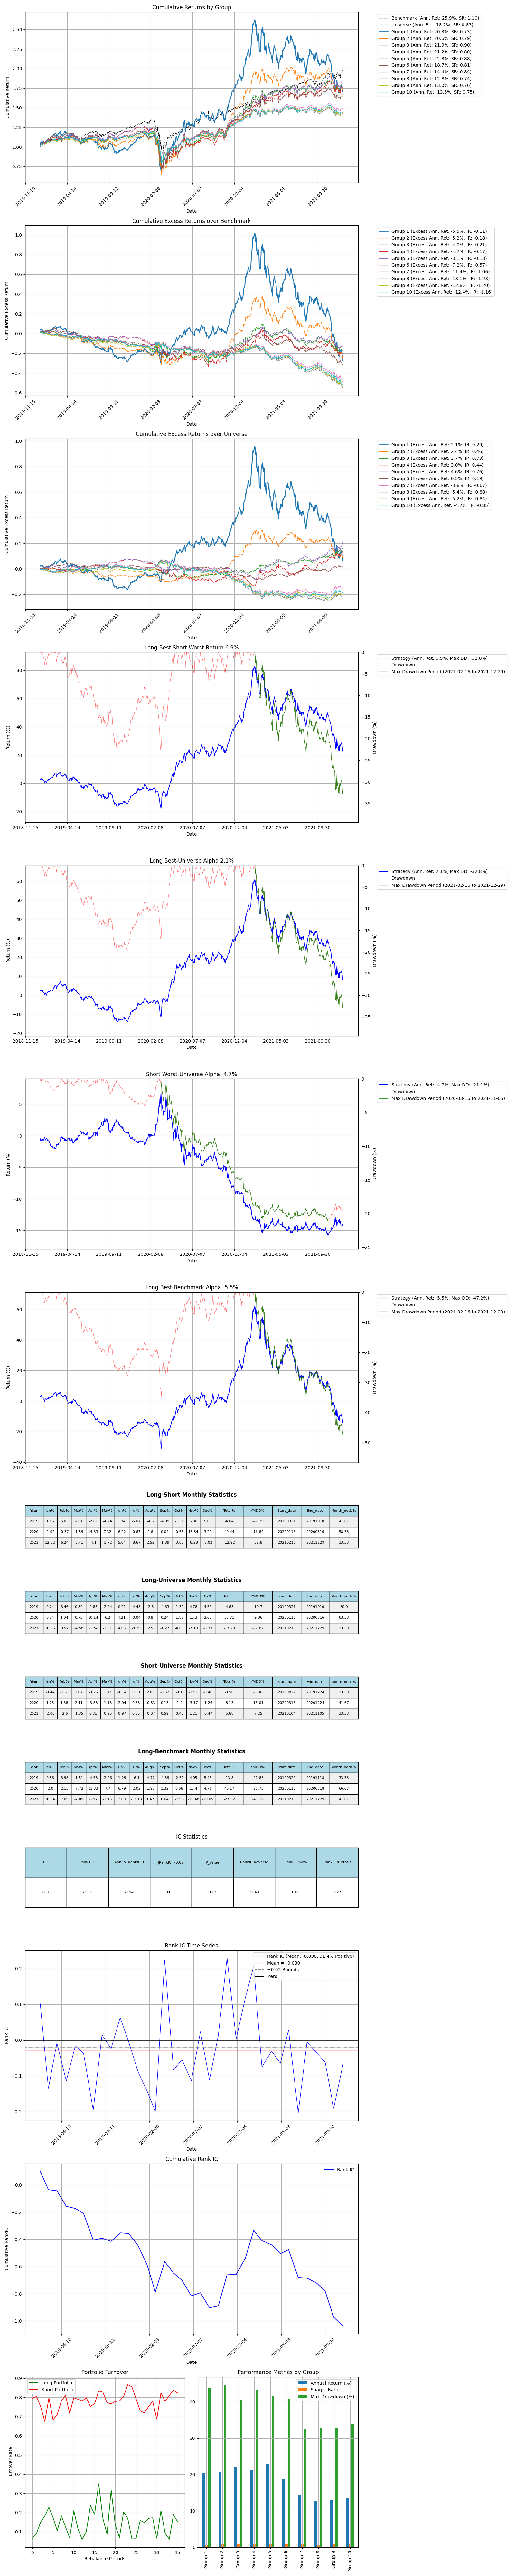

In [6]:
fig = factor_analysis.plot_performance_summary(interactive=False)
plt.show()

In [11]:
factor_analysis.save_performance_summary_pdfs(output_dir='my_performance_plots', dpi=2400)


PDF files have been saved to my_performance_plots/
